# Data Exploration


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import unidecode
import seaborn as sns


## Load data and Initial Exploration


In [ ]:
DATA_PATH = '../data/raw/'


### Accounts



The accounts table contains company-level information about potential or existing clients. Each row represents a company, including attributes such as sector, year of establishment, estimated annual revenue, number of employees, office location, and any parent company affiliation. This data provides demographic and firmographic context useful for understanding customer profiles and segmenting the market.

In [ ]:
data_accounts = pd.read_csv(DATA_PATH + 'accounts.csv').copy()
data_accounts.head()


,account,sector,year_established,revenue,employees,office_location,subsidiary_of
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN
1,Betasoloin,medical,1999,251.41,495,United States,NaN
2,Betatech,medical,1986,647.18,1185,Kenya,NaN
3,Bioholding,medical,2012,587.34,1356,Philipines,NaN
4,Bioplex,medical,1991,326.82,1016,United States,NaN


In [ ]:
print("INFO")
data_accounts.info()


INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account           85 non-null     object 
 1   sector            85 non-null     object 
 2   year_established  85 non-null     int64  
 3   revenue           85 non-null     float64
 4   employees         85 non-null     int64  
 5   office_location   85 non-null     object 
 6   subsidiary_of     15 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.8+ KB


In [ ]:
print("\nMissing Values")
data_accounts.isna().sum()



Missing Values


account              0
sector               0
year_established     0
revenue              0
employees            0
office_location      0
subsidiary_of       70
dtype: int64

In [ ]:
print("\nUnique Values")
data_accounts.nunique()



Unique Values


account             85
sector              10
year_established    35
revenue             85
employees           85
office_location     15
subsidiary_of        7
dtype: int64

**Observations on data_accounts**

    No critical missing values: only the subsidiary_of column has 70 missing values → this can be interpreted as "not a subsidiary of another company."

    Each account is unique → likely a primary identifier.

    sector contains 10 distinct categories → a potentially useful categorical variable for segmentation.

    revenue and employees appear to be continuous numerical variables, unique per company.

    year_established has 35 unique values → could be grouped into ranges for age-related analysis.

    office_location has 15 unique values → could be mapped by region or country if grouping is needed.

    subsidiary_of has only 7 unique values → likely names of parent companies. This could be used to identify business groups.


### Data Dictionary

The data_dictionary table provides metadata for the entire dataset. It includes the name of each table, the fields within them, and a brief description of each field’s meaning or purpose. This reference is useful to understand the role of each variable and ensure consistent interpretation during data exploration, preprocessing, and modeling.

In [ ]:
data_dictionary = pd.read_csv(DATA_PATH + 'data_dictionary.csv').copy()
data_dictionary.head()


,Table,Field,Description
0,accounts,account,Company name
1,accounts,sector,Industry
2,accounts,year_established,Year Established
3,accounts,revenue,Annual revenue (in millions of USD)
4,accounts,employees,Number of employees


In [ ]:
print("INFO")
data_dictionary.info()


INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Table        21 non-null     object
 1   Field        21 non-null     object
 2   Description  21 non-null     object
dtypes: object(3)
memory usage: 632.0+ bytes


In [ ]:
print("\nMissing Values")
data_dictionary.isna().sum()



Missing Values


Table          0
Field          0
Description    0
dtype: int64

In [ ]:
print("\nUnique Values")
data_dictionary.nunique()



Unique Values


Table           4
Field          18
Description    19
dtype: int64

**Observations on data_dictionary**

    No missing values → the table is complete.
    Contains 21 rows, each describing a field in a table.
    Table has 4 unique values → 4 documented tables.
    Field has 18 unique values → total number of documented fields.
    Description has 19 unique entries → some may be repeated or closely related.
    This table is purely for reference, not used directly for modeling, but essential for:
       - Understanding the meaning of each dataset column.
       - Generating automatic documentation if needed.


### Products

The products table contains information about the company’s product catalog. Each row represents a unique product, including its name, product series (e.g., GTX, MG), and the corresponding sales price. This data can be used to analyze pricing strategies, evaluate deal values, and link product types to sales performance.

In [ ]:
data_products = pd.read_csv(DATA_PATH + 'products.csv').copy()
data_products.head()


,product,series,sales_price
0,GTX Basic,GTX,550
1,GTX Pro,GTX,4821
2,MG Special,MG,55
3,MG Advanced,MG,3393
4,GTX Plus Pro,GTX,5482


In [ ]:
print("INFO")
data_products.info()


INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product      7 non-null      object
 1   series       7 non-null      object
 2   sales_price  7 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 296.0+ bytes


In [ ]:
print("\nMissing Values")
data_products.isna().sum()



Missing Values


product        0
series         0
sales_price    0
dtype: int64

In [ ]:
print("\nUnique Values")
data_products.nunique()



Unique Values


product        7
series         3
sales_price    7
dtype: int64

**Observations on data_products**

    No missing values → the table is clean.
    Only 7 products in total → small and manageable dataset.
    series has 3 categories (e.g., GTX, MG…) → likely represent product lines.
    sales_price is numeric with 7 unique values → each product has a distinct price.
    This table will be useful to join with the sales pipeline (sales_pipeline) to analyze:
        -Which products are sold the most?
        -Which series generate the highest revenue?
        -Does price influence conversion rates?


### Sales Pipeline

The sales_pipeline table records individual sales opportunities from the company's CRM system. Each row represents a unique opportunity and includes details such as the sales agent, product involved, customer account, deal stage (e.g., Won, Lost), engagement and close dates, and the final deal value. This dataset is essential for analyzing sales performance, conversion timelines, and agent effectiveness.

In [ ]:
data_sales_pipeline = pd.read_csv(DATA_PATH + 'sales_pipeline.csv').copy()
data_sales_pipeline.head()


,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0


In [ ]:
print("INFO")
data_sales_pipeline.info()


INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   opportunity_id  8800 non-null   object 
 1   sales_agent     8800 non-null   object 
 2   product         8800 non-null   object 
 3   account         7375 non-null   object 
 4   deal_stage      8800 non-null   object 
 5   engage_date     8300 non-null   object 
 6   close_date      6711 non-null   object 
 7   close_value     6711 non-null   float64
dtypes: float64(1), object(7)
memory usage: 550.1+ KB


In [ ]:
print("\nMissing Values")
data_sales_pipeline.isna().sum()



Missing Values


opportunity_id       0
sales_agent          0
product              0
account           1425
deal_stage           0
engage_date        500
close_date        2089
close_value       2089
dtype: int64

In [ ]:
print("\nUnique Values")
data_sales_pipeline.nunique()



Unique Values


opportunity_id    8800
sales_agent         30
product              7
account             85
deal_stage           4
engage_date        421
close_date         306
close_value       2051
dtype: int64

**Observations on data_sales_pipeline**

    There are important missing values:
        account: 1,425 missing → some opportunities may not be assigned to a specific account.
        engage_date, close_date, close_value: around 2,000 missing values → may indicate deals still in progress or not yet closed.
    Opportunity_id is unique per row → clear identifier for each sales opportunity.
    Sales_agent has 30 unique values → could be used to analyze individual performance or grouped by manager (via a join with sales_team).
    Product can be joined with data_products → useful for checking price, product line, and linking to outcomes.
    Deal_stage has 4 unique values → critical categorical variable to model the sales process (e.g., Won, Lost, etc.).
    Engage_date and close_date are still strings (object) and should be converted to datetime for time-based analysis:

### Sales Team

The sales_team table provides organizational information about the company’s sales agents. Each row includes a sales agent’s name, their direct manager, and the regional office they are assigned to. This data can be used to analyze team structures, compare performance across regions, and identify managerial influence on sales outcomes.

In [ ]:
data_sales_team = pd.read_csv(DATA_PATH + 'sales_teams.csv').copy()
data_sales_team.head()


,sales_agent,manager,regional_office
0,Anna Snelling,Dustin Brinkmann,Central
1,Cecily Lampkin,Dustin Brinkmann,Central
2,Versie Hillebrand,Dustin Brinkmann,Central
3,Lajuana Vencill,Dustin Brinkmann,Central
4,Moses Frase,Dustin Brinkmann,Central


In [ ]:
print("INFO")
data_sales_team.info()


INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sales_agent      35 non-null     object
 1   manager          35 non-null     object
 2   regional_office  35 non-null     object
dtypes: object(3)
memory usage: 968.0+ bytes


In [ ]:
print("\nMissing Values")
data_sales_team.isna().sum()



Missing Values


sales_agent        0
manager            0
regional_office    0
dtype: int64

In [ ]:
print("\nUnique Values")
data_sales_team.nunique()



Unique Values


sales_agent        35
manager             6
regional_office     3
dtype: int64

**Observations on data_sales_team**

    No missing values → perfectly clean table.
    35 unique rows, one per sales_agent → matches the expected size of the sales team.
    manager has only 6 unique values → clear hierarchical structure, ideal for performance analysis by leader.
    regional_office has 3 unique values → enables comparisons across geographic regions.
    This table will be useful to join with sales_pipeline via sales_agent in order to:
        -Evaluate which manager or region closes more deals.
        -Detect potential performance disparities between teams.

## Dataset Overview Summary


In [ ]:
def summarize_datasets(datasets_dict):
    summary = []

    for name, df in datasets_dict.items():
        summary.append(
            {
                "Dataset": name,
                "Rows": df.shape[0],
                "Columns": df.shape[1],
                "Missing Values": df.isna().sum().sum(),
                "Duplicated Rows": df.duplicated().sum(),
            }
        )

    return pd.DataFrame(summary)


In [ ]:
datasets = {
    "Accounts": data_accounts,
    "Data Disctionary": data_dictionary,
    "Products": data_products,
    "Sales Pipeline": data_sales_pipeline,
    "Sales team": data_sales_team,
}

summary_df = summarize_datasets(datasets)
summary_df


,Dataset,Rows,Columns,Missing Values,Duplicated Rows
0,Accounts,85,7,70,0
1,Data Disctionary,21,3,0,0
2,Products,7,3,0,0
3,Sales Pipeline,8800,8,6103,0
4,Sales team,35,3,0,0


# Data Cleaning & Transformation


In [ ]:
def clean_string_columns(df, exclude_columns=None):
    """
    Clean string columns in a DataFrame:
    - Strip whitespace
    - Convert to lowercase
    - Remove accents/special characters
    - Skip columns in exclude_columns
    """
    if exclude_columns is None:
        exclude_columns = []

    for col in df.select_dtypes(include='object').columns:
        if col not in exclude_columns:
            df[col] = df[col].apply(lambda x: unidecode.unidecode(
                x.strip().lower()) if isinstance(x, str) else x)

    return df


## Data Sales_pipeline


In [ ]:
# Clean string columns in data_sales_pipeline, excluding the ID
data_sales_pipeline = clean_string_columns(
    data_sales_pipeline, exclude_columns=['opportunity_id'])


###  Engage_Date & Close_date


In [ ]:
data_sales_pipeline["engage_date"] = pd.to_datetime(
    data_sales_pipeline["engage_date"])
data_sales_pipeline["close_date"] = pd.to_datetime(
    data_sales_pipeline["close_date"])


In [ ]:
data_sales_pipeline[["engage_date", "close_date"]].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   engage_date  8300 non-null   datetime64[ns]
 1   close_date   6711 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 137.6 KB


In [ ]:
data_sales_pipeline[data_sales_pipeline["engage_date"].isna()].head()


,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
8300,6CWZFOHJ,anna snelling,gtx basic,green-plus,prospecting,NaT,NaT,NaN
8301,3LCLVRVV,anna snelling,gtx basic,NaN,prospecting,NaT,NaT,NaN
8302,YIU1B39V,anna snelling,gtx basic,NaN,prospecting,NaT,NaT,NaN
8303,8E0VRCLW,anna snelling,gtx basic,NaN,prospecting,NaT,NaT,NaN
8304,G99CS23F,anna snelling,gtx basic,NaN,prospecting,NaT,NaT,NaN


In [ ]:
data_sales_pipeline["engage_date"].isna().sum()


np.int64(500)

In [ ]:
data_sales_pipeline["close_date"].isna().sum()


np.int64(2089)

In [ ]:
def classify_opportunity(row):
    if pd.isna(row["engage_date"]):
        return "initial"
    elif pd.isna(row["close_date"]):
        return "in_progress"
    else:
        return "completed"


data_sales_pipeline["opportunity_status"] = data_sales_pipeline.apply(
    classify_opportunity, axis=1
)
data_sales_pipeline.head()


,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,opportunity_status
0,1C1I7A6R,moses frase,gtx plus basic,cancity,won,2016-10-20,2017-03-01,1054.0,completed
1,Z063OYW0,darcel schlecht,gtxpro,isdom,won,2016-10-25,2017-03-11,4514.0,completed
2,EC4QE1BX,darcel schlecht,mg special,cancity,won,2016-10-25,2017-03-07,50.0,completed
3,MV1LWRNH,moses frase,gtx basic,codehow,won,2016-10-25,2017-03-09,588.0,completed
4,PE84CX4O,zane levy,gtx basic,hatfan,won,2016-10-25,2017-03-02,517.0,completed


In [ ]:
pd.crosstab(
    data_sales_pipeline["deal_stage"], data_sales_pipeline["opportunity_status"]
)


opportunity_status,completed,in_progress,initial
deal_stage,,,
engaging,0,1589,0
lost,2473,0,0
prospecting,0,0,500
won,4238,0,0


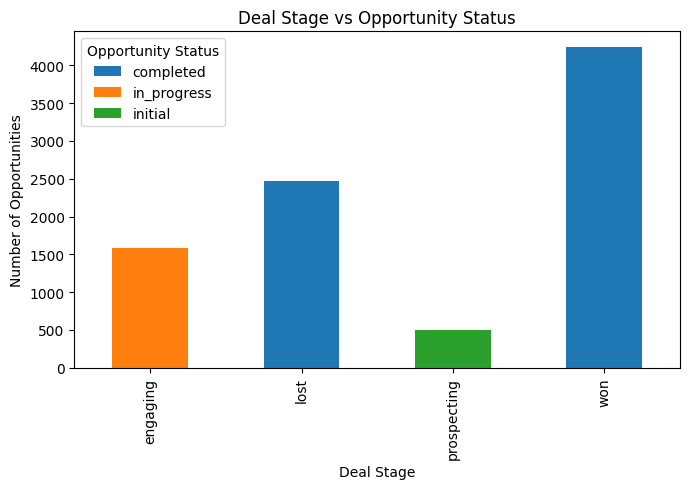

In [ ]:
crosstab_df = pd.crosstab(
    data_sales_pipeline["deal_stage"], data_sales_pipeline["opportunity_status"]
)

crosstab_df.plot(kind="bar", stacked=True, figsize=(7, 5))
plt.title("Deal Stage vs Opportunity Status")
plt.xlabel("Deal Stage")
plt.ylabel("Number of Opportunities")
plt.legend(title="Opportunity Status")
plt.tight_layout()
plt.show()


#### **Deal Stage vs. Opportunity Status – Discussion Notes**

The crosstab above reveals a misalignment between the CRM-labeled `deal_stage` and the actual state of the opportunity based on dates.

- `Prospecting` matches perfectly with `initial` (500 rows) → as expected.
- `Won` and `Lost` align with `completed`, which makes sense because both imply a final outcome.
- But `Engaging` is fully labeled as `in_progress`, and **none** are marked as `completed`, even though we would expect some of them to have been closed by now.

#### **Implications**
- There may be inconsistencies in how sales agents update `deal_stage`. It’s possible that some deals were closed but the stage was never updated from `Engaging` to `Won` or `Lost`.
- Our `opportunity_status` column reflects the actual data available (based on `engage_date` and `close_date`), making it more reliable for modeling purposes.

#### **Options for the team:**
1. **Rely on `opportunity_status`** (date-based) for filtering and training the model, since it reflects actual data.
2. Use `deal_stage` as an **additional feature** (not as a filter) to enrich the model, especially in the MVP version.
3. **Create a combined or corrected status** field that integrates both sources (e.g., if `close_date` exists but `deal_stage` is still "Engaging", flag it as inconsistent).
4. Flag and review rows where `deal_stage` seems outdated given the dates, as part of a data quality step.

#### **Decision to make**
We should agree as a team whether to:
- Train models using only `opportunity_status == 'completed'`
- Include `in_progress` or `initial` records for some models (like early prediction)
- Consider fixing or cleaning `deal_stage` manually if time allows

#### **Additional observation: close_date and close_value**

It's worth noting that the number of missing values in `close_date` and `close_value` is exactly the same (2089 rows). This suggests a direct link: when a deal hasn't been closed (`close_date` is NaT), its value is also unknown (`close_value` is NaN).

This further supports our classification logic:
- If both dates are missing → the opportunity is likely still in the initial stage.
- If `engage_date` exists but `close_date` and `close_value` are missing → the opportunity is in progress.
- If both dates exist → the opportunity is completed, with a known value.

This pattern reinforces the reliability of the `opportunity_status` column for modeling.


## Data Account


In [ ]:
data_accounts = clean_string_columns(data_accounts)


In [ ]:
data_sales_pipeline["account"].isna().sum()


np.int64(1425)

In [ ]:
# Check what deal_stage those missing accounts belong to
print("\nDeal Stage distribution for missing 'account':")
data_sales_pipeline[data_sales_pipeline["account"].isna()
                    ]["deal_stage"].value_counts()



Deal Stage distribution for missing 'account':


deal_stage
engaging       1088
prospecting     337
Name: count, dtype: int64

In [ ]:
# Check what opportunity_status those missing accounts belong to
print("\nOpportunity Status distribution for missing 'account':")
data_sales_pipeline[data_sales_pipeline["account"].isna()][
    "opportunity_status"
].value_counts()



Opportunity Status distribution for missing 'account':


opportunity_status
in_progress    1088
initial         337
Name: count, dtype: int64

In [ ]:
data_sales_pipeline["has_account"] = data_sales_pipeline["account"].notna()


In [ ]:
data_sales_pipeline.head()


,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,opportunity_status,has_account
0,1C1I7A6R,moses frase,gtx plus basic,cancity,won,2016-10-20,2017-03-01,1054.0,completed,True
1,Z063OYW0,darcel schlecht,gtxpro,isdom,won,2016-10-25,2017-03-11,4514.0,completed,True
2,EC4QE1BX,darcel schlecht,mg special,cancity,won,2016-10-25,2017-03-07,50.0,completed,True
3,MV1LWRNH,moses frase,gtx basic,codehow,won,2016-10-25,2017-03-09,588.0,completed,True
4,PE84CX4O,zane levy,gtx basic,hatfan,won,2016-10-25,2017-03-02,517.0,completed,True


In [ ]:
pd.crosstab(
    data_sales_pipeline["opportunity_status"], data_sales_pipeline["has_account"]
)


has_account,False,True
opportunity_status,,
completed,0,6711
in_progress,1088,501
initial,337,163


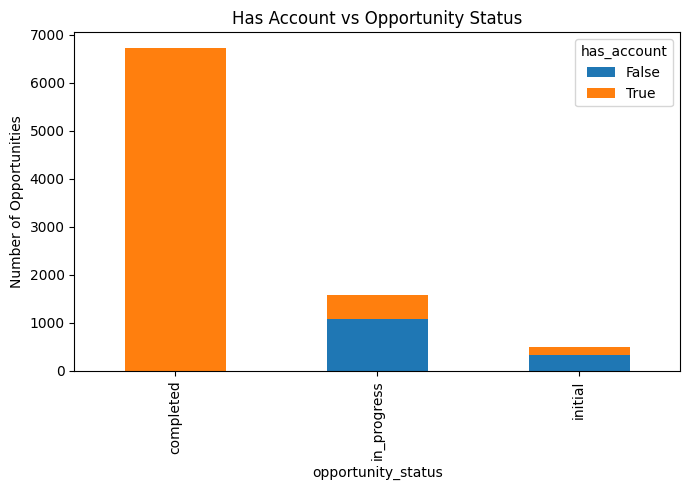

In [ ]:
pd.crosstab(
    data_sales_pipeline["opportunity_status"], data_sales_pipeline["has_account"]
).plot(kind="bar", stacked=True, figsize=(7, 5))
plt.title("Has Account vs Opportunity Status")
plt.ylabel("Number of Opportunities")
plt.tight_layout()
plt.show()


#### **Observations and Options – Missing Account**
A total of 1,425 opportunities are missing an associated account.
All of them fall into early sales stages (Prospecting and Engaging) and are labeled as either initial or in_progress in opportunity_status.
    *This means they do not affect completed sales, as all completed deals have an account assigned.

**Implications:**

These opportunities can be kept in the dataset if we want to build models or analyses involving early-stage predictions.
If we plan to enrich the dataset by joining with data_accounts, we should be aware that these rows won't match.

**Options for the team:**

    -Keep them as-is, especially if early-stage modeling is relevant.
    -Create a boolean column like has_account = True/False to capture this signal and use it as a feature.
    -Filter them out temporarily using ~data_sales_pipeline['account'].isna() if we need full rows for joins or     feature engineering.
    -Optionally, review them separately as a "pre-qualification" group that may require follow-up from the business side.

#### **Consistency Between Deal Stage and Opportunity Status**
Interestingly, when we look at the 1,425 opportunities missing an account, we notice a perfect match between deal_stage and our custom opportunity_status:

All rows with deal_stage == "Engaging" are labeled as in_progress.
All rows with deal_stage == "Prospecting" are labeled as initial.

This confirms the reliability of our opportunity_status column, especially for early-stage opportunities.
It also suggests that, at least in these cases, the deal_stage field is consistent with the actual data (dates).

However, we previously saw that this alignment breaks for some rows with Engaging that have a close_date, which are still labeled in_progress in deal_stage.

This insight supports the idea of relying primarily on opportunity_status for modeling and using deal_stage as a secondary or supporting feature, while also flagging inconsistencies where needed.

**Now that we have clarified how account availability aligns with opportunity progress, we can proceed to explore the sales_agent and team-related information to further enrich our modeling dataset**

## Data Sales_team

In [ ]:
data_sales_team = clean_string_columns(data_sales_team)
data_sales_team.head()


,sales_agent,manager,regional_office
0,anna snelling,dustin brinkmann,central
1,cecily lampkin,dustin brinkmann,central
2,versie hillebrand,dustin brinkmann,central
3,lajuana vencill,dustin brinkmann,central
4,moses frase,dustin brinkmann,central


In [ ]:
data_sales_team.shape


(35, 3)

### Merge data_sales_team with data_sales_pipeline

In [ ]:
data_sales_pipeline_and_team = data_sales_pipeline.merge(
    data_sales_team,
    on='sales_agent',
    how='left')
data_sales_pipeline_and_team.head()


,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,opportunity_status,has_account,manager,regional_office
0,1C1I7A6R,moses frase,gtx plus basic,cancity,won,2016-10-20,2017-03-01,1054.0,completed,True,dustin brinkmann,central
1,Z063OYW0,darcel schlecht,gtxpro,isdom,won,2016-10-25,2017-03-11,4514.0,completed,True,melvin marxen,central
2,EC4QE1BX,darcel schlecht,mg special,cancity,won,2016-10-25,2017-03-07,50.0,completed,True,melvin marxen,central
3,MV1LWRNH,moses frase,gtx basic,codehow,won,2016-10-25,2017-03-09,588.0,completed,True,dustin brinkmann,central
4,PE84CX4O,zane levy,gtx basic,hatfan,won,2016-10-25,2017-03-02,517.0,completed,True,summer sewald,west


In [ ]:
data_sales_pipeline_and_team[['manager', 'regional_office']].isna().sum()


manager            0
regional_office    0
dtype: int64

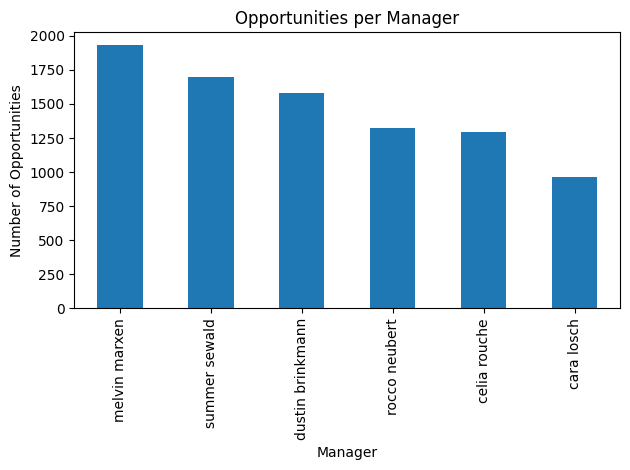

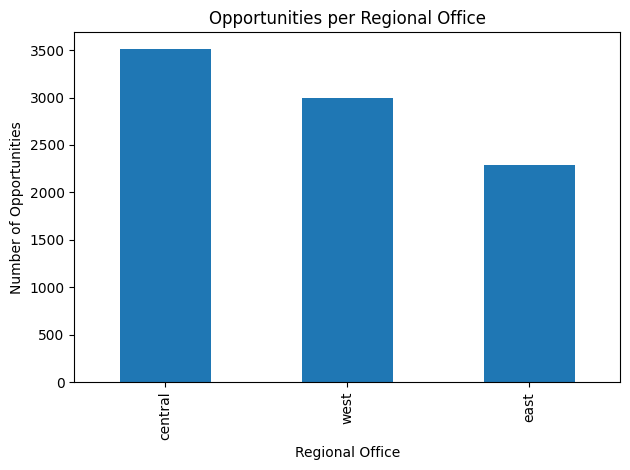

In [ ]:
# Number of opportunities per manager
data_sales_pipeline_and_team['manager'].value_counts().plot(
    kind='bar', title='Opportunities per Manager')
plt.xlabel('Manager')
plt.ylabel('Number of Opportunities')
plt.tight_layout()
plt.show()

# Number of opportunities per regional office
data_sales_pipeline_and_team['regional_office'].value_counts().plot(
    kind='bar', title='Opportunities per Regional Office')
plt.xlabel('Regional Office')
plt.ylabel('Number of Opportunities')
plt.tight_layout()
plt.show()


**Opportunities per Manager**

Objective:
Visualize how sales opportunities are distributed across managers.

Key Observations:

    -Some managers (e.g., Marxen, Sewald) manage significantly more opportunities.
    -The distribution is uneven — potential indicator of team size, performance, or assignment strategy.

Why it matters:

    -Use as a baseline to assess performance and fairness.
    -Could inspire engineered features:
        manager_workload
        opportunities_per_manager

**Opportunities per Regional Office**

Objective:
Understand workload distribution across geographic regions.

Key Observations:

    -The Central office dominates in opportunity volume, followed by West and South.
    -Imbalance may reflect client density, office size, or market strategy.
Why it matters:

    -Consider feature engineering:
        regional_opportunity_density
    -Use this to control for geographic bias in performance metrics or modeling.


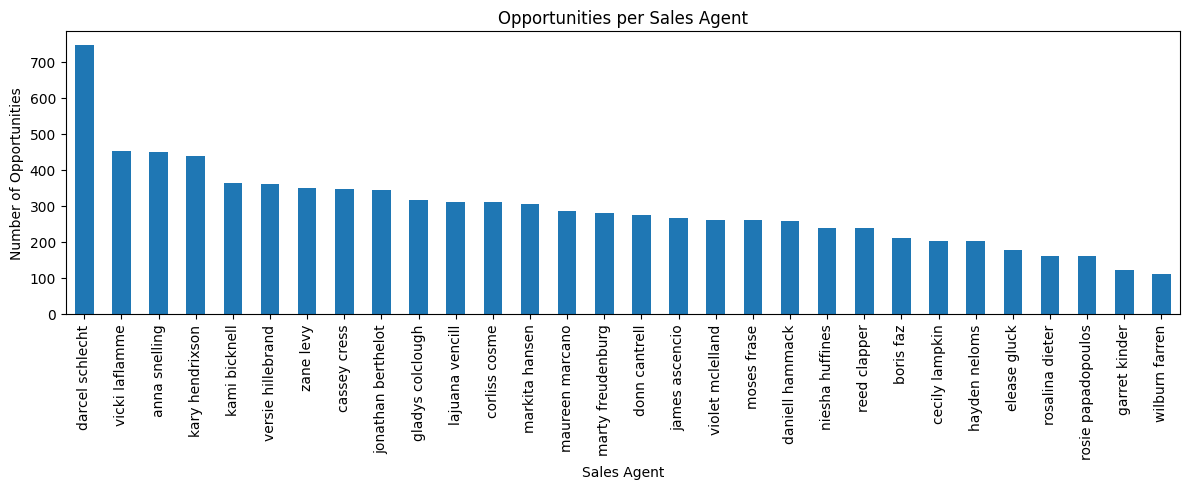

In [ ]:
data_sales_pipeline_and_team['sales_agent'].value_counts().plot(
    kind='bar', figsize=(12, 5), title='Opportunities per Sales Agent')
plt.xlabel('Sales Agent')
plt.ylabel('Number of Opportunities')
plt.tight_layout()
plt.show()


**Target Distribution – Sales Agent**

Objective:

Assess how evenly opportunities are distributed among individual sales agents.

Key Observations:

    -Strong class imbalance:
        Schlecht handles the most, Farren the least.
    -Skewed distribution could bias predictive models.

Implications for Modeling:

    -Classification models might learn to favor high-frequency agents.
    -Consider techniques to handle imbalance:
        → Use class_weight='balanced' (e.g., in logistic regression or random forest)
        → Try oversampling (e.g., SMOTE) or undersampling
        → Group rare agents if they’re not essential as individual classes
        



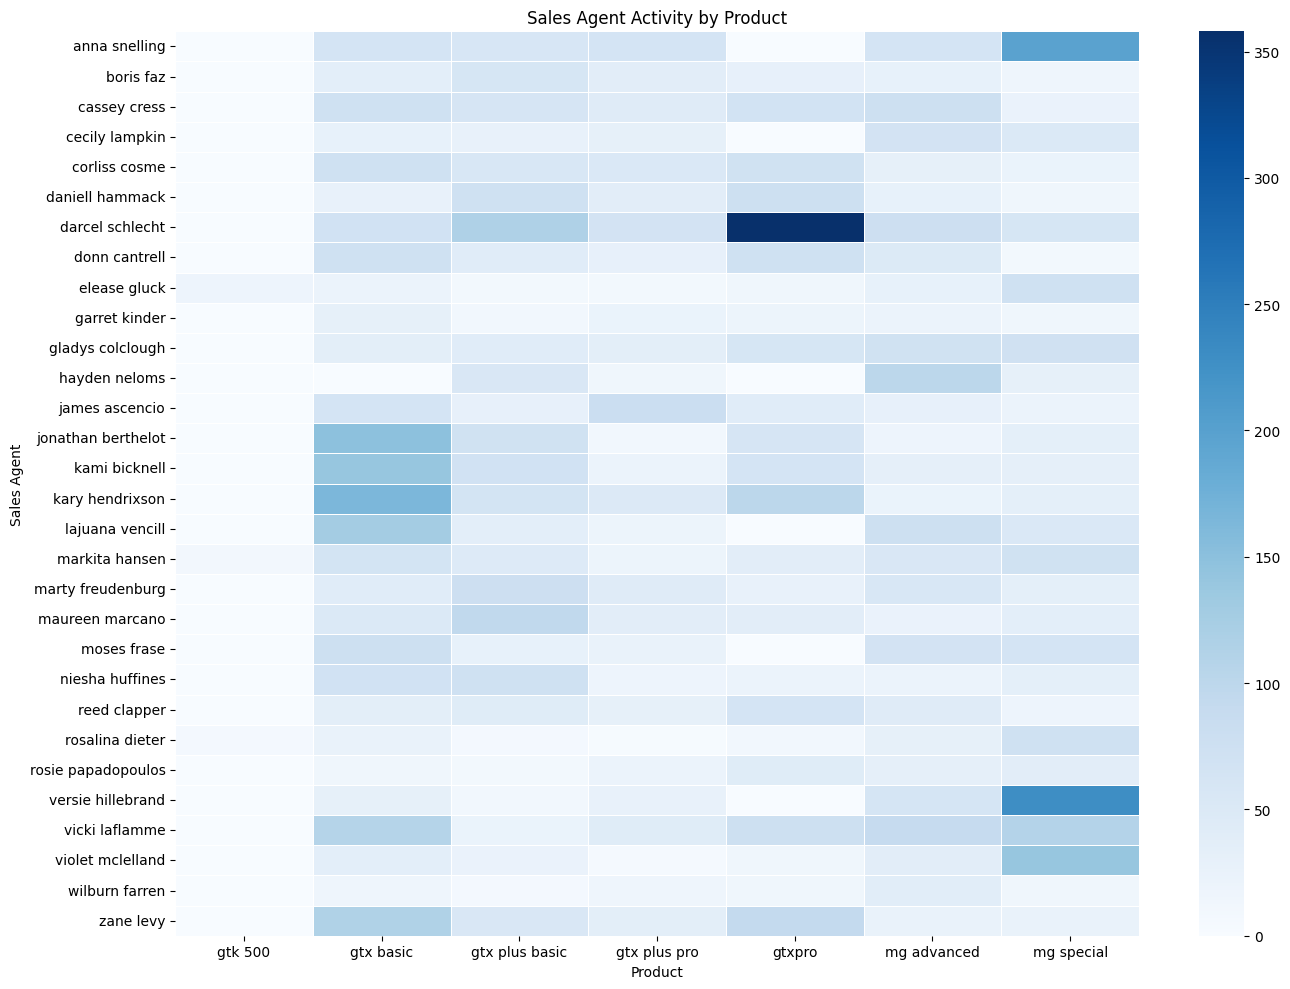

In [ ]:
pivot_table = pd.crosstab(
    data_sales_pipeline_and_team['sales_agent'], data_sales_pipeline_and_team['product'])

plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, cmap='Blues', linewidths=.5)
plt.title('Sales Agent Activity by Product')
plt.xlabel('Product')
plt.ylabel('Sales Agent')
plt.tight_layout()
plt.show()


**Sales Agent Activity by Product – Heatmap**

Objective:

Explore specialization patterns between agents and products.

Key Observations:

    -Product is a strong predictor of the assigned sales agent.
    -Clear specialization patterns:
        → Darcel Schlecht dominates in gtx plus pro
        → Versie Hillebrand in mg special
    -Some agents are product specialists, while others handle a wider variety of products.
    -Products like gtx basic are managed by many agents → less informative.
    -Products with focused handling are more predictive and may strengthen the model.

Implications for Modeling:

    -Product should be included as a key feature in the MVP classification model.
    -Consider engineering a new feature like is_specialist to improve predictions.
    -This analysis may also guide segmentation or territory assignment strategies.


## Data Products

In [ ]:
data_products = clean_string_columns(data_products)
data_products.head()


,product,series,sales_price
0,gtx basic,gtx,550
1,gtx pro,gtx,4821
2,mg special,mg,55
3,mg advanced,mg,3393
4,gtx plus pro,gtx,5482


In [ ]:
# Merge product info into sales_pipeline
pipeline_with_products = data_sales_pipeline_and_team.merge(
    data_products,
    on='product',
    how='left'
)
pipeline_with_products.head()


,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,opportunity_status,has_account,manager,regional_office,series,sales_price
0,1C1I7A6R,moses frase,gtx plus basic,cancity,won,2016-10-20,2017-03-01,1054.0,completed,True,dustin brinkmann,central,gtx,1096.0
1,Z063OYW0,darcel schlecht,gtxpro,isdom,won,2016-10-25,2017-03-11,4514.0,completed,True,melvin marxen,central,NaN,NaN
2,EC4QE1BX,darcel schlecht,mg special,cancity,won,2016-10-25,2017-03-07,50.0,completed,True,melvin marxen,central,mg,55.0
3,MV1LWRNH,moses frase,gtx basic,codehow,won,2016-10-25,2017-03-09,588.0,completed,True,dustin brinkmann,central,gtx,550.0
4,PE84CX4O,zane levy,gtx basic,hatfan,won,2016-10-25,2017-03-02,517.0,completed,True,summer sewald,west,gtx,550.0


### Which products are sold the most?

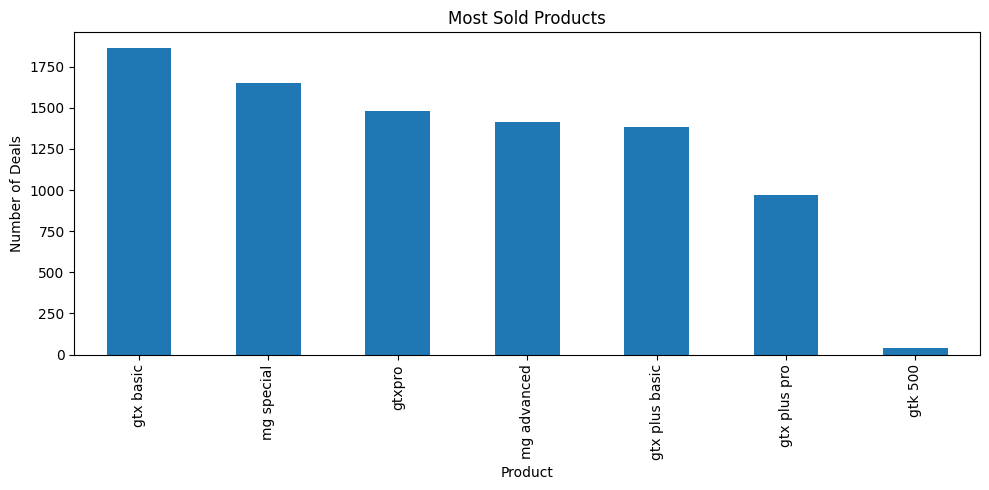

In [ ]:
pipeline_with_products['product'].value_counts().plot(
    kind='bar',
    title='Most Sold Products',
    figsize=(10, 5)
)
plt.xlabel('Product')
plt.ylabel('Number of Deals')
plt.tight_layout()
plt.show()


**Most Sold Products**

Objective:

Identify which products are the most frequently sold in the sales pipeline.

Key Observations:

    -GTX Basic is the top-selling product by volume, followed by MG Special and GTX Pro.
    -GTK 500 has the lowest number of sales — potentially a niche or underperforming product.
    -The product portfolio shows a mix of balanced and highly skewed sales volumes.
Implications for Modeling:

    -High-volume products may dominate predictions if the model isn’t properly regularized or balanced.
    -Including product as a categorical feature is likely useful, but we should monitor for overfitting to the top products.
    -Could consider grouping low-frequency products or applying smoothing techniques.
    -Product popularity may correlate with sales agent specialization (already seen in the heatmap), supporting feature interactions.

### Which series generate the highest revenue?

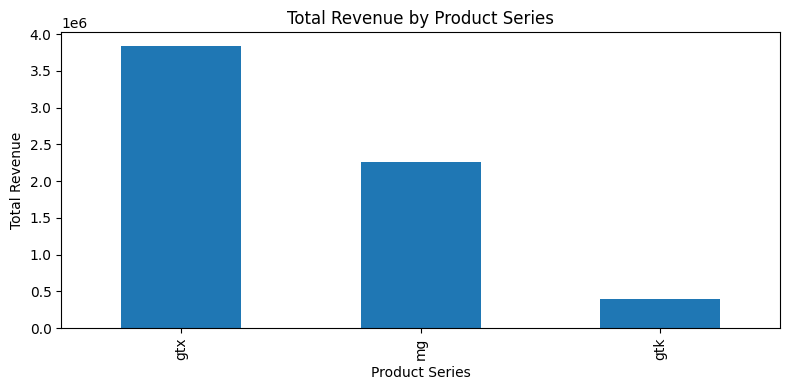

In [ ]:
revenue_by_series = pipeline_with_products.groupby(
    'series')['close_value'].sum().sort_values(ascending=False)

revenue_by_series.plot(
    kind='bar',
    title='Total Revenue by Product Series',
    figsize=(8, 4)
)
plt.xlabel('Product Series')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


**Total Revenue by Product Series**
Objective:

Understand which product series generate the most revenue overall.

Key Observations:

    -The GTX series generates the highest total revenue by far.
    -MG follows with substantial revenue but notably lower than GTX.
    -GTK contributes very little to overall revenue.
Implications for Modeling:

    -Series could be a useful input feature, especially in scenarios where budget or revenue prediction is relevant (e.g., your multi-output version).
    -High-revenue series may correlate with priority assignments to specific agents or regions.
    -Could be used to engineer a feature like high_value_series.
    -Beware of overfitting if model learns to associate success only with GTX.

## Data Dictionary

In [ ]:
data_dictionary = clean_string_columns(data_dictionary)


In [ ]:
for i, row in data_dictionary.iterrows():
    print(f"- **{row['Field']}** ({row['Table']}): {row['Description']}")


- **account** (accounts): company name
- **sector** (accounts): industry
- **year_established** (accounts): year established
- **revenue** (accounts): annual revenue (in millions of usd)
- **employees** (accounts): number of employees
- **office_location** (accounts): headquarters
- **subsidiary_of** (accounts): parent company
- **product** (products): product name
- **series** (products): product series
- **sales_price** (products): suggested retail price
- **sales_agent** (sales_teams): sales agent
- **manager** (sales_teams): respective sales manager
- **regional_office** (sales_teams): regional office
- **opportunity_id** (sales_pipeline): unique identifier
- **sales_agent** (sales_pipeline): sales agent
- **product** (sales_pipeline): product name
- **account** (sales_pipeline): company name
- **deal_stage** (sales_pipeline): sales pipeline stage (prospecting > engaging > won / lost)
- **engage_date** (sales_pipeline): date in which the "engaging" deal stage was initiated
- **clos

# Decision Science Insights

**Business Question:**  
Which sales agent generates the highest average revenue per product?

**Goal:**  
Identify patterns between specific products and sales agents that consistently lead to higher closed revenue. This helps guide the Machine Learning model by reinforcing the importance of agent-product pairing.

**KPIs:**
- Mean closed revenue per product/series/manager
- Agent specialization
- Distribution of revenue across segments

## Agent-Product Revenue Patterns

### Which agent generates the most revenue per product?

In [ ]:
# Mean close_value by product and sales agent
product_agent_revenue = pipeline_with_products.groupby(
    ['product', 'sales_agent'])['close_value'].mean().unstack().fillna(0)
product_agent_revenue = product_agent_revenue.sort_index()
product_agent_revenue


sales_agent,anna snelling,boris faz,cassey cress,cecily lampkin,corliss cosme,daniell hammack,darcel schlecht,donn cantrell,elease gluck,garret kinder,...,moses frase,niesha huffines,reed clapper,rosalina dieter,rosie papadopoulos,versie hillebrand,vicki laflamme,violet mclelland,wilburn farren,zane levy
product,,,,,,,,,,,,,,,,,,,,,
gtk 500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15386.000000,0.000000,...,0.000000,0.000000,0.000000,22075.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
gtx basic,341.901961,347.730769,339.637931,364.833333,369.814815,335.000000,379.698113,330.567568,443.437500,275.225806,...,433.322034,332.528302,350.324324,381.466667,412.111111,354.700000,366.746988,329.240000,391.250000,329.974684
gtx plus basic,567.520833,730.571429,660.558140,876.000000,664.318182,650.641509,737.433735,555.463415,765.285714,705.083333,...,738.041667,710.574074,715.904762,829.800000,496.000000,540.625000,756.894737,604.705882,1106.000000,654.069767
gtx plus pro,3180.708333,3520.551724,3050.250000,3271.333333,4227.710526,3723.000000,3762.638298,3110.966667,1111.000000,2818.173913,...,3021.916667,4720.266667,3193.406250,3195.500000,3077.055556,3803.809524,3293.296296,2333.600000,3081.727273,3603.156250
gtxpro,0.000000,3426.521739,3404.471698,0.000000,3285.072727,3434.280702,2917.467925,2690.698630,3934.900000,3093.900000,...,0.000000,651.071429,3156.682540,4237.000000,3960.451613,0.000000,3203.830508,2798.222222,3449.153846,3261.318841
mg advanced,1600.177778,2133.157895,2063.216667,2276.000000,1423.952381,1231.636364,1973.114754,2265.000000,1847.166667,2433.181818,...,2141.238095,2375.588235,2123.068182,2408.304348,1841.750000,1954.369565,1934.430380,2213.344828,2432.344828,1944.222222
mg special,39.555556,33.571429,36.533333,35.846154,37.562500,34.400000,36.046512,17.111111,34.588235,36.933333,...,31.413043,30.090909,43.736842,31.519231,33.969697,38.420118,35.125000,35.935185,31.909091,27.350000


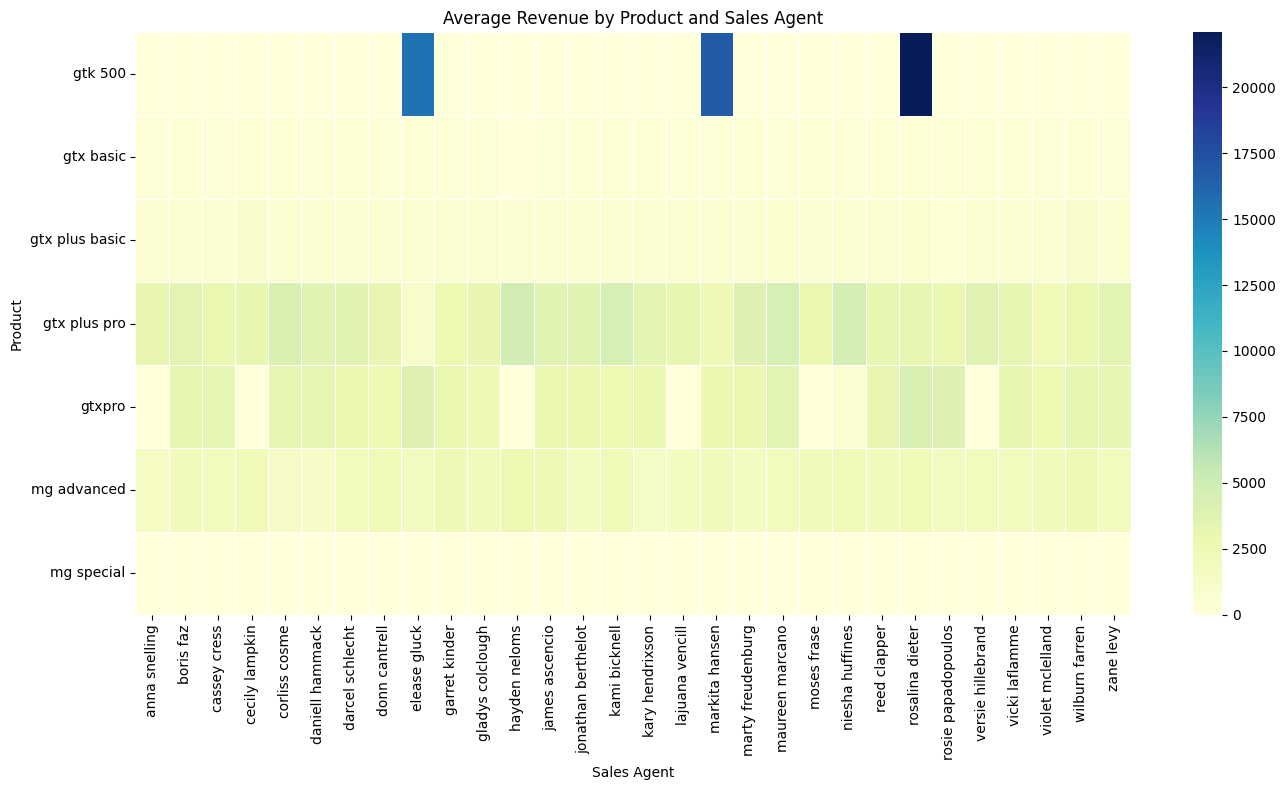

In [ ]:
# heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(product_agent_revenue, cmap="YlGnBu", linewidths=0.5)
plt.title("Average Revenue by Product and Sales Agent")
plt.xlabel("Sales Agent")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


**Conclusion**
From the heatmap and pivot table, we observed that a few agents such as Red Clapper and Moses Frase consistently achieve higher average revenue for certain products like `gtk 500` and `gtx plus basic`. Some products are highly dependent on specific agents, suggesting specialization or stronger client-agent fit. These patterns highlight the potential value of agent-product matching in optimizing revenue.


###  Which agent generates the most revenue per product?

In [ ]:
product_agent_revenue.idxmax()


sales_agent
anna snelling         gtx plus pro
boris faz             gtx plus pro
cassey cress                gtxpro
cecily lampkin        gtx plus pro
corliss cosme         gtx plus pro
daniell hammack       gtx plus pro
darcel schlecht       gtx plus pro
donn cantrell         gtx plus pro
elease gluck               gtk 500
garret kinder               gtxpro
gladys colclough      gtx plus pro
hayden neloms         gtx plus pro
james ascencio        gtx plus pro
jonathan berthelot    gtx plus pro
kami bicknell         gtx plus pro
kary hendrixson       gtx plus pro
lajuana vencill       gtx plus pro
markita hansen             gtk 500
marty freudenburg     gtx plus pro
maureen marcano       gtx plus pro
moses frase           gtx plus pro
niesha huffines       gtx plus pro
reed clapper          gtx plus pro
rosalina dieter            gtk 500
rosie papadopoulos          gtxpro
versie hillebrand     gtx plus pro
vicki laflamme        gtx plus pro
violet mclelland            gtxpro
wilburn 

### Are some products consistently underperforming regardless of agent?

In [ ]:
# Mean revenue per product across all agents
avg_revenue_per_product = product_agent_revenue.mean(axis=1).sort_values()

# Show lowest performing products
avg_revenue_per_product.head(5)


product
mg special          35.058527
gtx basic          340.532673
gtx plus basic     684.405859
gtk 500           1805.564444
mg advanced       2025.047890
dtype: float64

### Which products are sold by only a few agents?




In [ ]:
# Count how many agents generated revenue > 0 for each product
agent_count_per_product = (product_agent_revenue > 0).sum(axis=1).sort_values()

# Show products that were sold by the fewest agents
agent_count_per_product.head(5)


product
gtk 500            3
gtxpro            24
gtx basic         29
gtx plus basic    30
gtx plus pro      30
dtype: int64

###  Do some agents specialize in specific products?

In [ ]:
# Count how many products each agent has sold (i.e., revenue > 0)
product_count_per_agent = (product_agent_revenue > 0).sum(axis=0).sort_values()

# Show agents with the narrowest product range
product_count_per_agent.head(5)


sales_agent
hayden neloms      4
anna snelling      5
cecily lampkin     5
lajuana vencill    5
moses frase        5
dtype: int64

### New feature: agent_product_strength

In [ ]:
# Create a mapping dictionary from the pivot table
agent_product_strength = product_agent_revenue.stack()

# Convert to a lookup dictionary
agent_product_dict = agent_product_strength.to_dict()

# Create the new feature in the original DataFrame
pipeline_with_products['agent_product_strength'] = pipeline_with_products.apply(
    lambda row: agent_product_dict.get(
        (row['product'], row['sales_agent']), 0),
    axis=1
)
pipeline_with_products.head(1)


,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,opportunity_status,has_account,manager,regional_office,series,sales_price,agent_product_strength
0,1C1I7A6R,moses frase,gtx plus basic,cancity,won,2016-10-20,2017-03-01,1054.0,completed,True,dustin brinkmann,central,gtx,1096.0,738.041667


### Revenue patterns by **series**

In [ ]:
# Mean close_value by series and sales agent
series_agent_revenue = pipeline_with_products.groupby(
    ['series', 'sales_agent'])['close_value'].mean().unstack().fillna(0)
series_agent_revenue = series_agent_revenue.sort_index()
series_agent_revenue.head(1)


sales_agent,anna snelling,boris faz,cassey cress,cecily lampkin,corliss cosme,daniell hammack,darcel schlecht,donn cantrell,elease gluck,garret kinder,...,moses frase,niesha huffines,reed clapper,rosalina dieter,rosie papadopoulos,versie hillebrand,vicki laflamme,violet mclelland,wilburn farren,zane levy
series,,,,,,,,,,,,,,,,,,,,,
gtk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15386.0,0.0,...,0.0,0.0,0.0,22075.333333,0.0,0.0,0.0,0.0,0.0,0.0


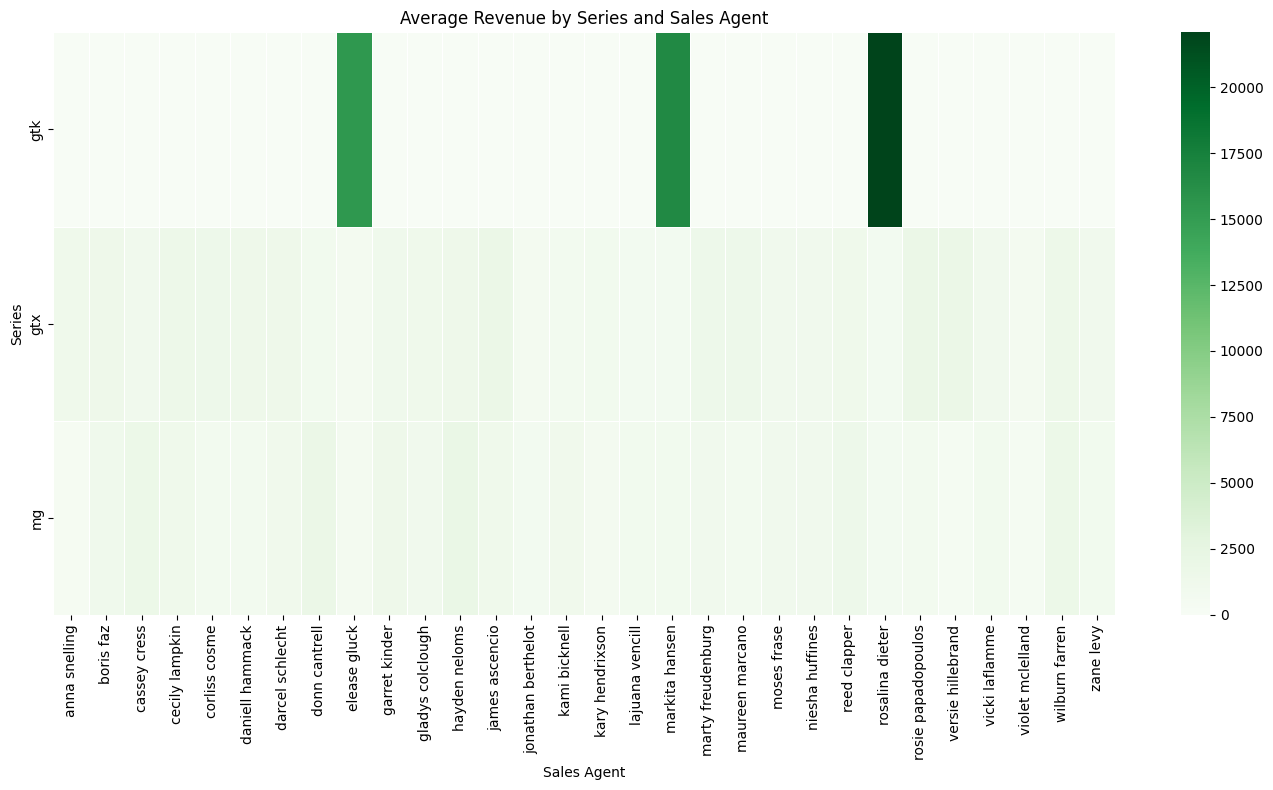

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(series_agent_revenue, cmap="Greens", linewidths=0.5)
plt.title("Average Revenue by Series and Sales Agent")
plt.xlabel("Sales Agent")
plt.ylabel("Series")
plt.tight_layout()
plt.show()


**Conclusion**
From the heatmap, we observe that a few sales agents (notably Elease Gluck, Markita Hansen, and Rosalina Dieter) generate significantly higher average revenue for the gtk series. Meanwhile, the gtx and mg series show more evenly distributed average revenue across agents, with less pronounced peaks.
This suggests that gtk deals are highly dependent on specific agents, while other series are handled more broadly. These patterns highlight the importance of matching gtk opportunities to high-performing agents.

### New feature Series_agent_revenue

In [ ]:
series_agent_revenue = pipeline_with_products.groupby(
    ['series', 'sales_agent']
)['close_value'].mean().unstack().fillna(0)


series_agent_strength = series_agent_revenue.stack().to_dict()


pipeline_with_products['series_agent_strength'] = pipeline_with_products.apply(
    lambda row: series_agent_strength.get(
        (row['series'], row['sales_agent']), 0),
    axis=1
)
pipeline_with_products.head(3)


,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,opportunity_status,has_account,manager,regional_office,series,sales_price,agent_product_strength,series_agent_strength
0,1C1I7A6R,moses frase,gtx plus basic,cancity,won,2016-10-20,2017-03-01,1054.0,completed,True,dustin brinkmann,central,gtx,1096.0,738.041667,1082.289720
1,Z063OYW0,darcel schlecht,gtxpro,isdom,won,2016-10-25,2017-03-11,4514.0,completed,True,melvin marxen,central,NaN,NaN,2917.467925,0.000000
2,EC4QE1BX,darcel schlecht,mg special,cancity,won,2016-10-25,2017-03-07,50.0,completed,True,melvin marxen,central,mg,55.0,36.046512,1172.211538


### Revenue patterns by **manager** 

In [ ]:
# Mean close_value by manager and sales agent
manager_agent_revenue = pipeline_with_products.groupby(
    ['manager', 'sales_agent'])['close_value'].mean().unstack().fillna(0)
manager_agent_revenue = manager_agent_revenue.sort_index()
manager_agent_revenue.head(1)


sales_agent,anna snelling,boris faz,cassey cress,cecily lampkin,corliss cosme,daniell hammack,darcel schlecht,donn cantrell,elease gluck,garret kinder,...,moses frase,niesha huffines,reed clapper,rosalina dieter,rosie papadopoulos,versie hillebrand,vicki laflamme,violet mclelland,wilburn farren,zane levy
manager,,,,,,,,,,,,,,,,,,,,,
cara losch,0.0,0.0,0.0,0.0,1838.585153,0.0,0.0,0.0,0.0,1607.910569,...,0.0,0.0,0.0,0.0,1902.22314,0.0,0.0,639.53886,1995.443038,0.0


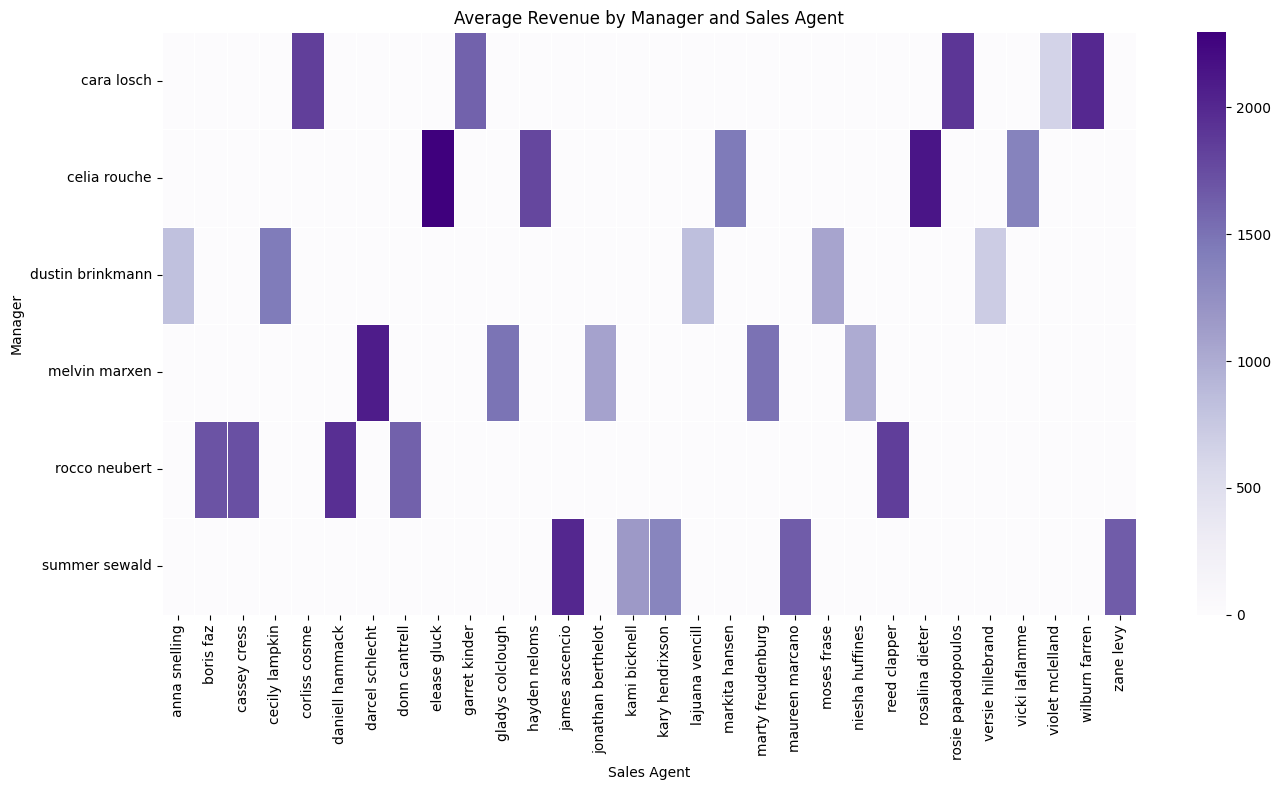

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(manager_agent_revenue, cmap="Purples", linewidths=0.5)
plt.title("Average Revenue by Manager and Sales Agent")
plt.xlabel("Sales Agent")
plt.ylabel("Manager")
plt.tight_layout()
plt.show()


**Conclusion**
The heatmap reveals clear performance patterns by manager. For example, agents under Celia Rouche, Melvin Marxen, and Rocco Neubert consistently achieve higher average revenue across multiple agents. Meanwhile, some managers (like Summer Sewald or Dustin Brinkmann) show more moderate or inconsistent performance.

These differences suggest that managerial leadership may influence agent success, either by training quality, resource allocation, or deal assignment. Incorporating manager-related features may improve predictions of revenue or success rate.



### New feature: `manager_agent_strength`

In [ ]:
manager_agent_revenue = pipeline_with_products.groupby(
    ['manager', 'sales_agent']
)['close_value'].mean().unstack().fillna(0)


manager_agent_strength = manager_agent_revenue.stack().to_dict()


pipeline_with_products['manager_agent_strength'] = pipeline_with_products.apply(
    lambda row: manager_agent_strength.get(
        (row['manager'], row['sales_agent']), 0),
    axis=1
)
pipeline_with_products.head(3)


,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,opportunity_status,has_account,manager,regional_office,series,sales_price,agent_product_strength,series_agent_strength,manager_agent_strength
0,1C1I7A6R,moses frase,gtx plus basic,cancity,won,2016-10-20,2017-03-01,1054.0,completed,True,dustin brinkmann,central,gtx,1096.0,738.041667,1082.289720,1062.471795
1,Z063OYW0,darcel schlecht,gtxpro,isdom,won,2016-10-25,2017-03-11,4514.0,completed,True,melvin marxen,central,NaN,NaN,2917.467925,0.000000,2085.377939
2,EC4QE1BX,darcel schlecht,mg special,cancity,won,2016-10-25,2017-03-07,50.0,completed,True,melvin marxen,central,mg,55.0,36.046512,1172.211538,2085.377939


### Final Conclusion – Agent-Product Insights
The analysis reveals that certain sales agents consistently generate higher average revenue for specific products, product series, and under certain managers. This specialization is evident in patterns such as:

Strong agent-product pairs (e.g. Reed Clapper with gtx plus basic).
Product lines like gtk 500 that depend heavily on a few top-performing agents.
Sales agents with narrow but high-performing product ranges.
Managers who consistently lead high-performing agents.
These insights justify the creation of engineered features like agent_product_strength, series_agent_strength, and manager_agent_strength, which quantify historical success at different levels.

These features will serve as predictors in our Machine Learning models, helping to match future opportunities with the most effective sales agent and increase the likelihood of winning deals and maximizing revenue.



## Deal Segmentation Strategy

**Business Question:**  
Should we assign large deals to high-performing agents and smaller ones to less busy agents?

**Goal:**  
Identify whether deal size affects closing performance depending on the agent, and define data-driven thresholds to better allocate opportunities.

**KPIs:**
- Close rate by deal size and agent performance  
- Revenue distribution across deal segments  
- Agent specialization by deal size

### Create a Deal Size Category Feature

In [ ]:
positive_values = pipeline_with_products[pipeline_with_products['close_value']
                                         > 0]['close_value']

q33 = positive_values.quantile(0.33)
q66 = positive_values.quantile(0.66)

bins = [0, q33, q66, positive_values.max()]
labels = ['small', 'medium', 'large']

pipeline_with_products['deal_size'] = pd.cut(
    pipeline_with_products['close_value'],
    bins=bins,
    labels=labels,
    include_lowest=True
)


pipeline_with_products['deal_size'] = pipeline_with_products['deal_size'].cat.add_categories(
    'zero')
pipeline_with_products['deal_size'] = pipeline_with_products['deal_size'].fillna(
    'zero')


pipeline_with_products['deal_size'].value_counts()


deal_size
small     3873
zero      2089
large     1440
medium    1398
Name: count, dtype: int64

/tmp/ipykernel_41359/2612592991.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agent_deal_revenue = pipeline_with_products.groupby(


deal_size,small,medium,large,zero
sales_agent,,,,
anna snelling,63.544000,1530.260000,5073.805556,0.0
boris faz,109.907895,1500.315789,5032.461538,0.0
cassey cress,71.790323,1672.764706,4751.289855,0.0
cecily lampkin,73.965909,2018.902439,4532.774194,0.0
corliss cosme,111.876106,1270.382979,5053.420290,0.0
daniell hammack,38.600000,1304.707317,5040.245902,0.0
darcel schlecht,49.521739,1563.260417,4855.941176,0.0
donn cantrell,110.032895,1786.600000,4865.764706,0.0
elease gluck,67.885057,1993.684211,12270.450000,0.0


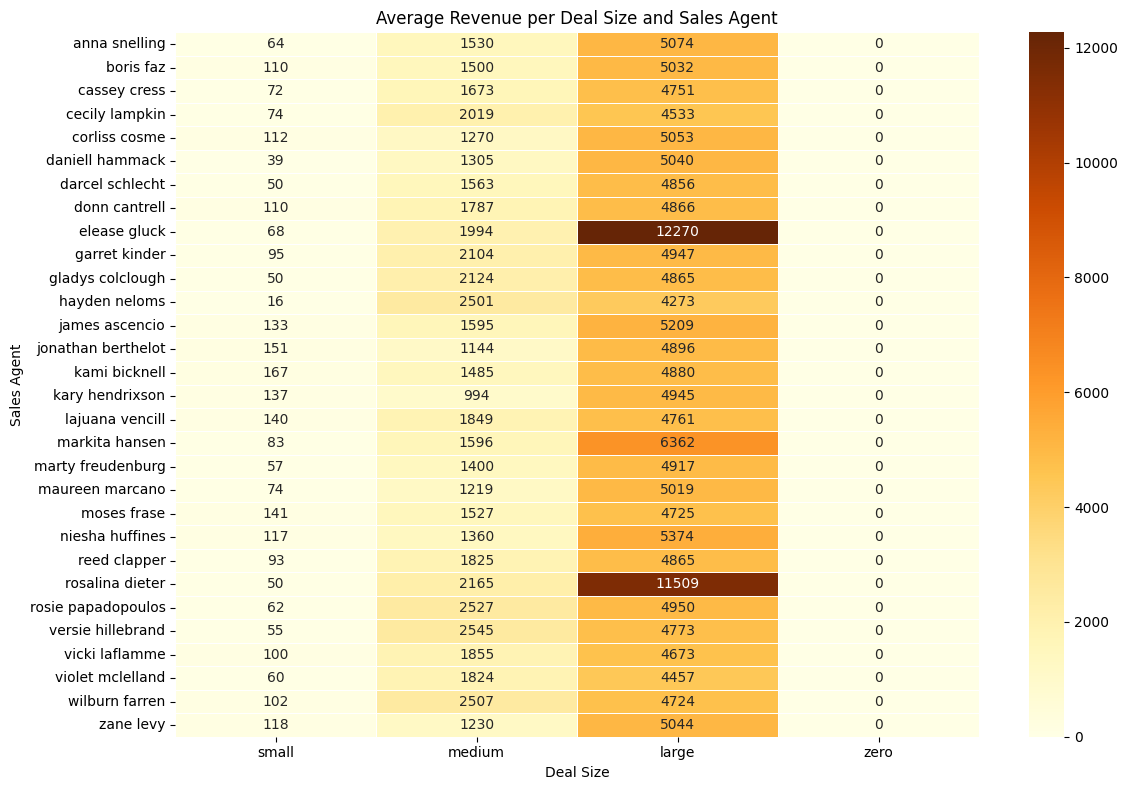

In [ ]:
agent_deal_revenue = pipeline_with_products.groupby(
    ['sales_agent', 'deal_size']
)['close_value'].mean().unstack().fillna(0)

display(agent_deal_revenue.sort_index())

plt.figure(figsize=(12, 8))
sns.heatmap(agent_deal_revenue, cmap="YlOrBr",
            linewidths=0.5, annot=True, fmt=".0f")
plt.title("Average Revenue per Deal Size and Sales Agent")
plt.xlabel("Deal Size")
plt.ylabel("Sales Agent")
plt.tight_layout()
plt.show()


**Conclusion – Agent Performance per Deal Size**

•Top performers in large deals:

    Elease Gluck and Rosalina Dieter stand out with average revenues exceeding €11,000 and €12,000 respectively in the large deal segment, suggesting a strong specialization in high-value opportunities.
    Markita Hansen and Niesha Huffines also show solid performance in this segment, exceeding €5,300 and €6,300 on average.
    
•Versatile agents:

    Reed Clapper, Garret Kinder, Marty Freudenburg, and Rosie Papadopoulos maintain consistently high revenue across all deal sizes, positioning them as adaptable and well-rounded performers.
    
•Untapped potential in small deals:

    Agents like Kami Bicknell, Daniell Hammack, and Jonathan Berthelot show lower performance levels, which could indicate a better fit for lower-value opportunities or a need for further training.

### Create the agent_deal_size_strength Feature

In [ ]:
agent_deal_strength = pipeline_with_products.groupby(
    ['sales_agent', 'deal_size']
)['close_value'].mean().unstack().fillna(0)

agent_deal_strength_dict = agent_deal_strength.stack().to_dict()

pipeline_with_products['agent_deal_size_strength'] = pipeline_with_products.apply(
    lambda row: agent_deal_strength_dict.get(
        (row['sales_agent'], row['deal_size']), 0),
    axis=1
)


/tmp/ipykernel_41359/1309128455.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agent_deal_strength = pipeline_with_products.groupby(


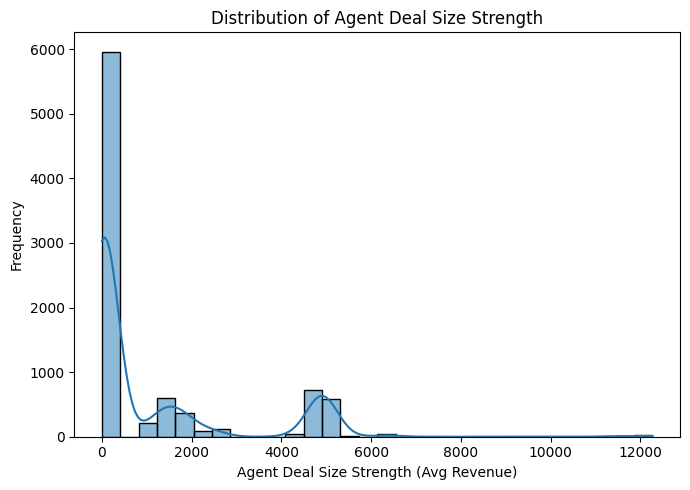

In [ ]:
plt.figure(figsize=(7, 5))
sns.histplot(
    pipeline_with_products['agent_deal_size_strength'], bins=30, kde=True)
plt.title("Distribution of Agent Deal Size Strength")
plt.xlabel("Agent Deal Size Strength (Avg Revenue)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


<Axes: xlabel='deal_size', ylabel='agent_deal_size_strength'>

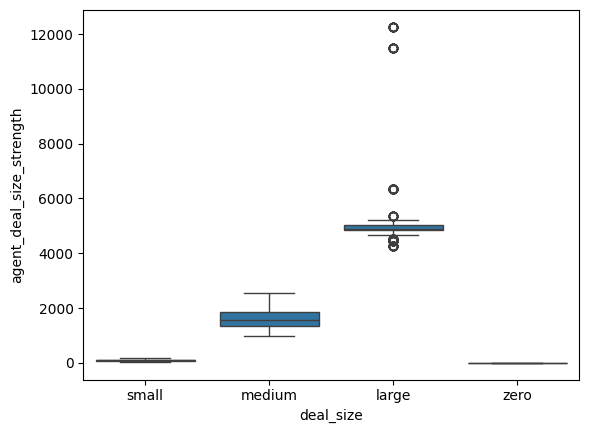

In [ ]:
sns.boxplot(x='deal_size', y='agent_deal_size_strength',
            data=pipeline_with_products)


**Final Conclusion: Deal Segmentation Strategy**

Interpretation:

The feature agent_deal_size_strength reveals clear performance patterns across different deal sizes. Most agents show modest average revenues, but a few—such as Elease Gluck and Rosalina Dieter—stand out significantly in large deals, with average revenues exceeding €12,000. This creates a strongly right-skewed distribution, indicating a high concentration of lower values and a long tail of top performers.

Boxplots by deal size confirm that performance scales with deal value, but also highlight the presence of strong outliers in the 'large' segment. These agents might represent highly specialized profiles suited for high-stakes opportunities.

Modeling Implications:

•agent_deal_size_strength is a powerful compound feature, encoding both agent identity and deal characteristics.

•Due to its skewed distribution, consider applying log transformation or robust scaling to normalize the input for models sensitive to variance.

•Outliers should be carefully assessed: if they reflect real performance, they are valuable signals; otherwise, consider capping or imputing extreme values.

•This feature could play a crucial role in optimizing agent-deal matching within your ML model, especially in combination with deal_size and product.

### Agent Close Rate per Segment

In [ ]:
valid_deals = pipeline_with_products[pipeline_with_products['opportunity_status'].isin([
                                                                                       'completed', 'lost'])]

valid_deals['won'] = (valid_deals['opportunity_status']
                      == 'completed').astype(int)

close_rate = valid_deals.groupby(['sales_agent', 'deal_size'])[
    'won'].mean().unstack().fillna(0)


/tmp/ipykernel_41359/3519238396.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_deals['won'] = (valid_deals['opportunity_status']
/tmp/ipykernel_41359/3519238396.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  close_rate = valid_deals.groupby(['sales_agent', 'deal_size'])[


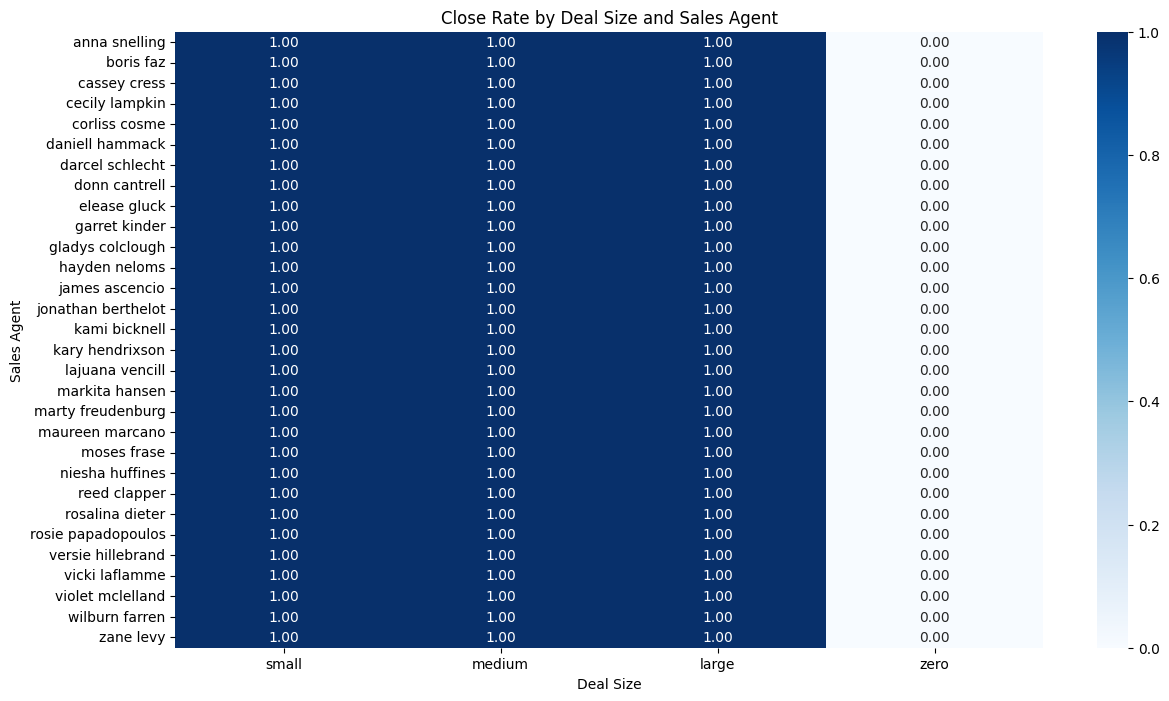

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(close_rate, annot=True, fmt=".2f", cmap="Blues")
plt.title("Close Rate by Deal Size and Sales Agent")
plt.xlabel("Deal Size")
plt.ylabel("Sales Agent")
plt.show()


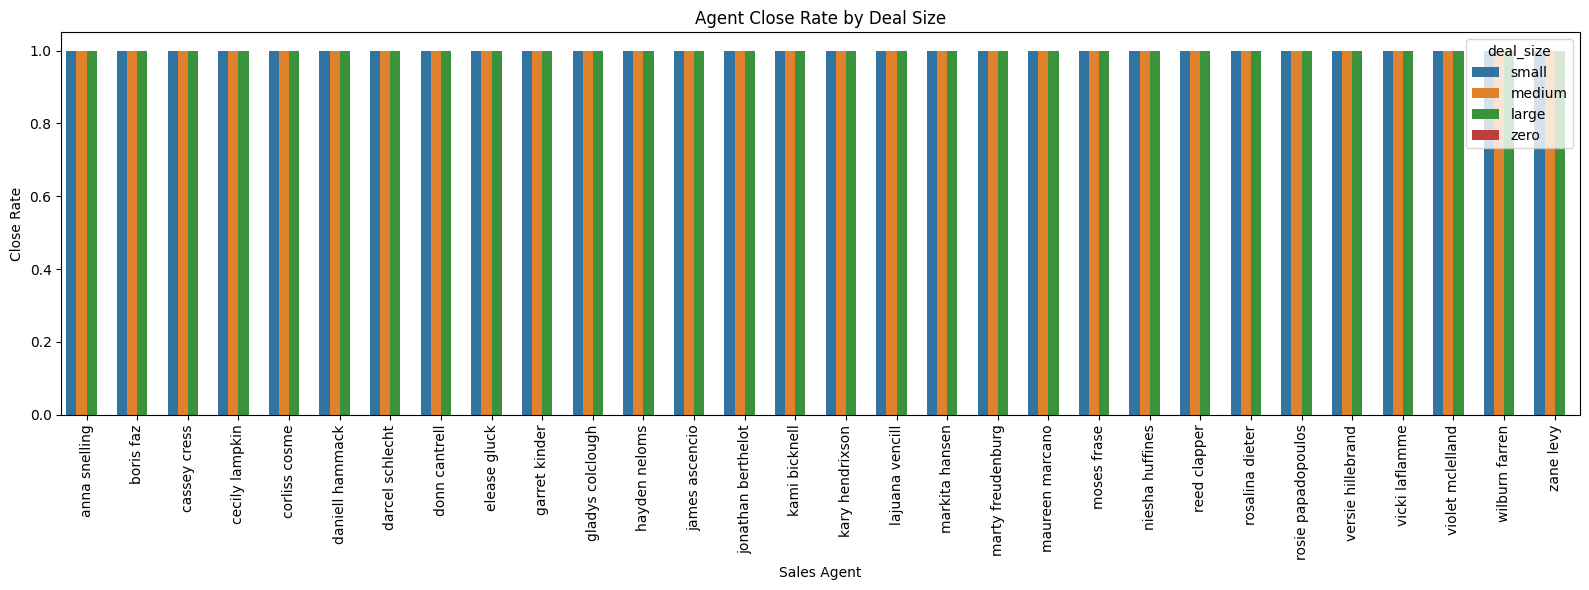

In [ ]:
close_rate_long = close_rate.reset_index().melt(id_vars='sales_agent',
                                                var_name='deal_size',
                                                value_name='close_rate')

plt.figure(figsize=(16, 6))
sns.barplot(data=close_rate_long, x='sales_agent',
            y='close_rate', hue='deal_size')
plt.xticks(rotation=90)
plt.title("Agent Close Rate by Deal Size")
plt.ylabel("Close Rate")
plt.xlabel("Sales Agent")
plt.tight_layout()
plt.show()


Despite our intention to compare deal close rates across deal sizes and sales agents, the data reveals a uniform 100% close rate for all agents in valid deals. This lack of variability suggests either a limitation in the dataset (e.g., absence of failed opportunities) or overly simplified sales dynamics. As such, this metric does not provide meaningful segmentation for our decision science framework or ML model guidance.

**Deal Size Segment Analysis – Summary & Insights**

**Segment Definition**

We successfully created a new feature, deal_size, by segmenting deals into four quantile-based categories: small, medium, large, and zero, based on the close_value amount. This variable captures the economic weight of each opportunity and enables performance benchmarking.

**Revenue Patterns by Agent and Deal Size**

Our analysis revealed clear differences in revenue performance across agents and deal sizes:

•Top performers in large deals:

    Elease Gluck and Rosalina Dieter stood out with average revenues above €12,000 and €11,000 respectively in the large segment, indicating strong specialization in high-value opportunities.
Markita Hansen and Niesha Huffines also showed solid performance, with averages over €6,300 and €5,300 respectively.

•Versatile performers:
    Agents like Reed Clapper, Garret Kinder, Marty Freudenburg, and Rosie Papadopoulos maintained high and stable performance across all deal sizes, suggesting adaptability to a wide range of client profiles.

•Underperformance in small deals:

    Agents such as Kami Bicknell, Daniell Hammack, or Jonathan Berthelot reported lower revenues in the small segment, potentially signaling a weaker fit with low-value opportunities or the need for additional training/coaching.

**Feature Distribution & Insights**

The new variable agent_deal_size_strength—representing the average revenue by agent per deal size—showed a right-skewed distribution with clear outliers in the large segment.
This confirms its high potential as a discriminative feature, especially for matching clients with agents who excel in specific deal types.

**Close Rate Limitation**
Our attempt to analyze the close_rate by deal size and sales agent returned 100% success rates across all segments. This uniformity is likely due to a dataset limitation (e.g., missing or incomplete lost opportunities), and renders the metric non-informative for this analysis.